In [1]:
import json
import os

with open('../config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']
print(data_path)

/scratch2/thdaryan/data/merged_result


In [3]:
import nltk
import numpy as np
import json
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score as meteor 

[nltk_data] Downloading package punkt to
[nltk_data]     /home/guest/thdaryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
references = np.load('../data/test/detectron2_with_target/references_from_0_to_1000.npy', allow_pickle=True)
expressions_1 = np.load('../data/test/detectron2_with_target/top5_exps_from_0_to_1000.npy', allow_pickle=True)

In [5]:
i = 4
with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{i}.json')) as json_file:
            label = json.load(json_file)
refs = [[r] for r in label['ref_sents']]
refs

[['front whit'],
 ['WHITE COW, FRONT MOST'],
 ['white cow next to the brown one']]

In [6]:
id = 4
tokenized_ref = []
ref_1 = [r[0] for r in references[id]]
print(ref_1)
for r in ref_1:
    lis=word_tokenize(r.lower())
    tokenized_ref.append(lis)
print(tokenized_ref)
print(expressions_1[id])
# print(word_tokenize(expressions_1[50][1]))

['front whit', 'WHITE COW, FRONT MOST', 'white cow next to the brown one']
[['front', 'whit'], ['white', 'cow', ',', 'front', 'most'], ['white', 'cow', 'next', 'to', 'the', 'brown', 'one']]
['the right sheep', 'lamb', 'gray sheep', 'horse', 'in forest cows']


In [7]:
BLEUscore = nltk.translate.bleu_score.sentence_bleu(tokenized_ref, ['shirt'])
print("BLEU:",BLEUscore)

BLEU: 0


In [8]:
bleu_score = []
files = [0,1000,2000,3000,4000]
for start in files:
    references = np.load(f'../data/test/detectron2_with_target/references_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    expressions = np.load(f'../data/test/detectron2_with_target/top5_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    for ref, exps in zip(references, expressions):
        item_reference = [word_tokenize(r[0].lower()) for r in ref]
    #     print(item_reference)
    #     print(exps)
    #     print('$$$$$$$$$$$')

        best_matched = max([sentence_bleu(item_reference, word_tokenize(exp), weights=(1,0,0,0)) for exp in exps])#[0]
        bleu_score.append(best_matched)
print(len(bleu_score))

/scratch2/hle/py3_env/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/scratch2/hle/py3_env/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/scratch2/hle/py3_env/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoothi

5000


In [9]:
x = [score for score in bleu_score if score != 0]
print(np.average(x), np.std(x))
print(np.average(bleu_score), np.std(bleu_score))
print(len(x))
# 0.3939225254870882 0.3270738202276801
# 0.1983005993302002 0.3043752780752566

0.45709701621171267 0.22055445152260553
0.39017801303831795 0.26006358688613634
4268


In [10]:
list_idx = []
for i in range(len(bleu_score)):
    if (bleu_score[i] == 0):
        list_idx.append(i)
list_idx

[11,
 12,
 14,
 23,
 24,
 29,
 46,
 51,
 81,
 95,
 102,
 105,
 109,
 118,
 123,
 126,
 141,
 148,
 156,
 158,
 165,
 168,
 183,
 186,
 191,
 194,
 200,
 201,
 204,
 213,
 216,
 218,
 220,
 222,
 227,
 235,
 248,
 249,
 257,
 258,
 267,
 281,
 283,
 285,
 294,
 295,
 296,
 300,
 302,
 316,
 317,
 318,
 330,
 336,
 339,
 362,
 369,
 375,
 376,
 381,
 382,
 391,
 396,
 405,
 412,
 413,
 415,
 427,
 434,
 446,
 456,
 465,
 468,
 472,
 478,
 494,
 505,
 509,
 522,
 525,
 528,
 529,
 532,
 535,
 538,
 573,
 576,
 578,
 590,
 592,
 614,
 615,
 629,
 635,
 638,
 644,
 649,
 652,
 667,
 669,
 670,
 683,
 685,
 698,
 702,
 703,
 713,
 720,
 722,
 725,
 730,
 733,
 735,
 736,
 740,
 744,
 746,
 764,
 776,
 780,
 781,
 783,
 784,
 785,
 794,
 797,
 812,
 815,
 816,
 817,
 824,
 834,
 835,
 837,
 849,
 856,
 857,
 860,
 861,
 873,
 875,
 884,
 899,
 911,
 925,
 926,
 934,
 936,
 956,
 958,
 972,
 973,
 983,
 989,
 990,
 994,
 1005,
 1007,
 1012,
 1035,
 1036,
 1038,
 1047,
 1051,
 1063,
 1065,
 107

### CALCULATE ROUGE SCORE


In [11]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [13]:
references = np.load('../data/test/detectron2_with_target/references_from_0_to_1000.npy', allow_pickle=True)
expressions_1 = np.load('../data/test/detectron2_with_target/top5_exps_from_0_to_1000.npy', allow_pickle=True)

In [14]:
cat_ref = references[1]
cat_exps = expressions_1[1]
print(cat_ref, cat_exps)

[['cat'], ['Cat on right'], ['cat, but not in reflection']] ['the left cat', 'furry cat', 'carpet', 'dog', 'couch']


In [15]:
test_scores = []
for i in cat_ref:
    score = scorer.score(i[0], cat_exps[1])
    print(score['rouge1'], score['rougeL'])
    test_scores.append(score['rouge1'])
print(np.average(test_scores))

Score(precision=0.5, recall=1.0, fmeasure=0.6666666666666666) Score(precision=0.5, recall=1.0, fmeasure=0.6666666666666666)
Score(precision=0.5, recall=0.3333333333333333, fmeasure=0.4) Score(precision=0.5, recall=0.3333333333333333, fmeasure=0.4)
Score(precision=0.5, recall=0.2, fmeasure=0.28571428571428575) Score(precision=0.5, recall=0.2, fmeasure=0.28571428571428575)
0.48730158730158724


In [16]:
rouge1_scores = []
rougeL_scores = []
for start in files:
    references = np.load(f'../data/test/detectron2_with_target/references_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    expressions = np.load(f'../data/test/detectron2_with_target/top5_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    for ref, exps in zip(references, expressions):
        item_reference = [word_tokenize(r[0].lower()) for r in ref]
        exp_recalls_rouge_1 = []
        exp_recalls_rouge_L = []
        for exp in exps:
            exp_recalls_rouge_1.append(np.average([scorer.score(target[0], exp)['rouge1'].recall for target in ref]))
            exp_recalls_rouge_L.append(np.average([scorer.score(target[0], exp)['rougeL'].recall for target in ref]))
        rouge1_scores.append(max(exp_recalls_rouge_1))
        rougeL_scores.append(max(exp_recalls_rouge_L))
print(len(rouge1_scores))

5000


In [17]:
nonzero_rouge1 = [score for score in rouge1_scores if score != 0]
print(np.average(nonzero_rouge1), np.std(nonzero_rouge1))
print(np.average(rouge1_scores), np.std(rouge1_scores))
# top3 :0.24809894991750528 0.16986040769537178
#0.1687072859439036 0.18169670240599997

0.320995224254617 0.2033758256035027
0.2767620823523308 0.21887013729229973


In [18]:
nonzero_rougeL = [score for score in rougeL_scores if score != 0]
print(np.average(nonzero_rougeL), np.std(nonzero_rougeL))
print(np.average(rougeL_scores), np.std(rougeL_scores))

0.3009032782050892 0.18976213022205085
0.259438806468428 0.20446277690734435


In [21]:
meteor_score = []
files = [0,1000,2000,3000,4000]
for start in files:
    references = np.load(f'../data/test/detectron2_with_target/references_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    expressions = np.load(f'../data/test/detectron2_with_target/top5_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    for ref, exps in zip(references, expressions):
        item_reference = [r[0].lower() for r in ref]
    #     print(item_reference)
    #     print(exps)
    #     print('$$$$$$$$$$$')
        best_matched = max([meteor(item_reference, exp) for exp in exps])
        meteor_score.append(best_matched)
print(len(meteor_score))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/guest/thdaryan/nltk_data'
    - '/scratch2/hle/py3_env/nltk_data'
    - '/scratch2/hle/py3_env/share/nltk_data'
    - '/scratch2/hle/py3_env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [8]:
import sys
sys.path.append("/scratch2/hle/git/refer")
from refer import REFER

In [9]:
refer = REFER("/scratch2/hle/git/refer/data","refcoco", "google")

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=6.39s)


In [11]:
import sys
sys.path.append("/scratch2/hle/git/refer")
sys.path.append("/scratch2/hle/git/rsa_refer")
sys.path.append('/scratch2/hle/git/refer/evaluation')
sys.path.append('/scratch2/hle/git/refer/evaluation/bleu')
sys.path.append('/scratch2/hle/git/refer/evaluation/cider')
sys.path.append('/scratch2/hle/git/refer/evaluation/meteor')
sys.path.append('/scratch2/hle/git/refer/evaluation/rouge')
sys.path.append('/scratch2/hle/git/refer/evaluation/tokenizer')
from refEvaluation import RefEvaluation
import json
import numpy as np
import pandas as pd
import os
from refer import REFER
refer = REFER('/scratch2/hle/git/refer/data', 'refcoco', 'google')


SyntaxError: invalid syntax (bleu_scorer.py, line 60)

In [4]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']
f = open('generated_expressions.json')
expressions = json.load(f)#np.load('/scratch2/hle/git/rsa_refer/data/generated_expressions/test/generated_expression_binary_utterance_lstm_adjusted/top3_exps_from_0_to_5000.npy', allow_pickle=True)
eval_expressions = []
for i in range(5000):
    df = pd.read_csv(os.path.join(data_path,'refCOCO/test/attr_tables/attr_'+str(i)+'.tsv'), encoding='utf-8',sep='\t')

    ref_id = df['ref_id'][0]
    eval_expressions.append({'sent': expressions[str(i)], 'ref_id':ref_id})
    if i % 100 == 0:
        print('done', i)


('done', 0)
('done', 100)
('done', 200)
('done', 300)
('done', 400)
('done', 500)
('done', 600)
('done', 700)
('done', 800)
('done', 900)
('done', 1000)
('done', 1100)
('done', 1200)
('done', 1300)
('done', 1400)
('done', 1500)
('done', 1600)
('done', 1700)
('done', 1800)
('done', 1900)
('done', 2000)
('done', 2100)
('done', 2200)
('done', 2300)
('done', 2400)
('done', 2500)
('done', 2600)
('done', 2700)
('done', 2800)
('done', 2900)
('done', 3000)
('done', 3100)
('done', 3200)
('done', 3300)
('done', 3400)
('done', 3500)
('done', 3600)
('done', 3700)
('done', 3800)
('done', 3900)
('done', 4000)
('done', 4100)
('done', 4200)
('done', 4300)
('done', 4400)
('done', 4500)
('done', 4600)
('done', 4700)
('done', 4800)
('done', 4900)


In [5]:
refEval = RefEvaluation(refer, eval_expressions)
refEval.evaluate()


tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 13272, 'guess': [10533, 5533, 1956, 1063], 'testlen': 10533, 'correct': [2508, 52, 2, 0]}
ratio: 0.793625678119
Bleu_1: 0.184
Bleu_2: 0.036
Bleu_3: 0.010
Bleu_4: 0.000
computing METEOR score...
METEOR: 0.079
computing Rouge score...
ROUGE_L: 0.197
computing CIDEr score...
CIDEr: 0.317


In [23]:
from refer import REFER
import matplotlib.pyplot as plt
import os 
import cv2

In [14]:
refer = REFER('/scratch2/hle/git/refer/data', 'refcoco', 'google')

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=6.39s)


In [21]:
ref_ids = refer.getRefIds(split='test')
image_ids = refer.getImgIds()

5000
ref_id [3301] (ann_id [513364])
1. guy walking around on the street
2. man in red jacket
3. person on right


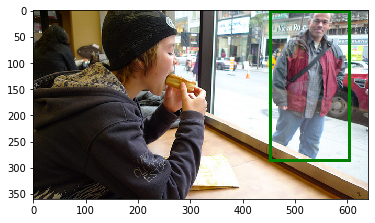

In [22]:
# randomly sample one ref
# ref_ids = refer.getRefIds()
ref_id = ref_ids[1462]#np.random.randint(0, len(ref_ids))]
print(len(ref_ids))
ref = refer.Refs[ref_id]
print ('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='box')
plt.show()

In [26]:
img_id = ref["image_id"]
ann_id = ref["ann_id"]
img_path = os.path.join(refer.IMAGE_DIR, refer.Imgs[img_id]["file_name"])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

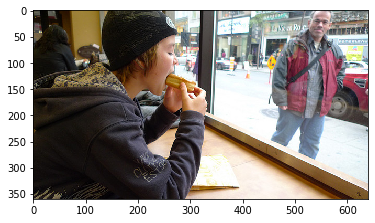

In [27]:
plt.imshow(img)

In [31]:
refer.Imgs[img_id]

{'coco_url': 'http://mscoco.org/images/544568',
 'date_captured': '2013-11-20 16:45:54',
 'file_name': 'COCO_train2014_000000544568.jpg',
 'flickr_url': 'http://farm3.staticflickr.com/2698/4051321547_1ac5ee7b3e_z.jpg',
 'height': 360,
 'id': 544568,
 'license': 3,
 'width': 640}

In [9]:
c = 0
for i in range(5000):
    if 'OOV' in exps[i]:
        c += 1
print(c)
with open('generated_expressions_with_true_target.json') as json_file:
        gen_exps = json.load(json_file)
print(len(gen_exps))

178
5000
